# TP 3.2 : Modélisation, Modèle linéaire et ANOVA

## 1. Régression linéaire simple

Pour ce premier exercice, nous manipulerons le jeu de données `cars`.

In [1]:
help(cars)

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data"

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir des formules rappelées en cours, calculer l'équation de la droite de régression de <code>cars&dollar;dist</code> en fonction de <code>cars&dollar;speed</code>.</li>
        <li>Retrouver ce résultat directement grâce à la fonction <code>lm()</code>.</li>
        <li>Calculer la part de variance expliquée par le modèle en fonction du rapport de la variance des résidus sur la variance initiale. Cette quantité s'appelle <i>coefficient de détermination linéaire de Pearson</i> ou plus simplement $R^2$.</li>
        <li>Représenter graphiquement le nuage de points des données traversé par la droite de régression.<br>
            <center><img src="img/regression_simple.png"></center>
        </li>
    </ol>
</div>

a= 3.932409 
 b= -17.57909 



Call:
lm(formula = cars$dist ~ cars$speed)

Coefficients:
(Intercept)   cars$speed  
    -17.579        3.932  


R2= 0.3489206 


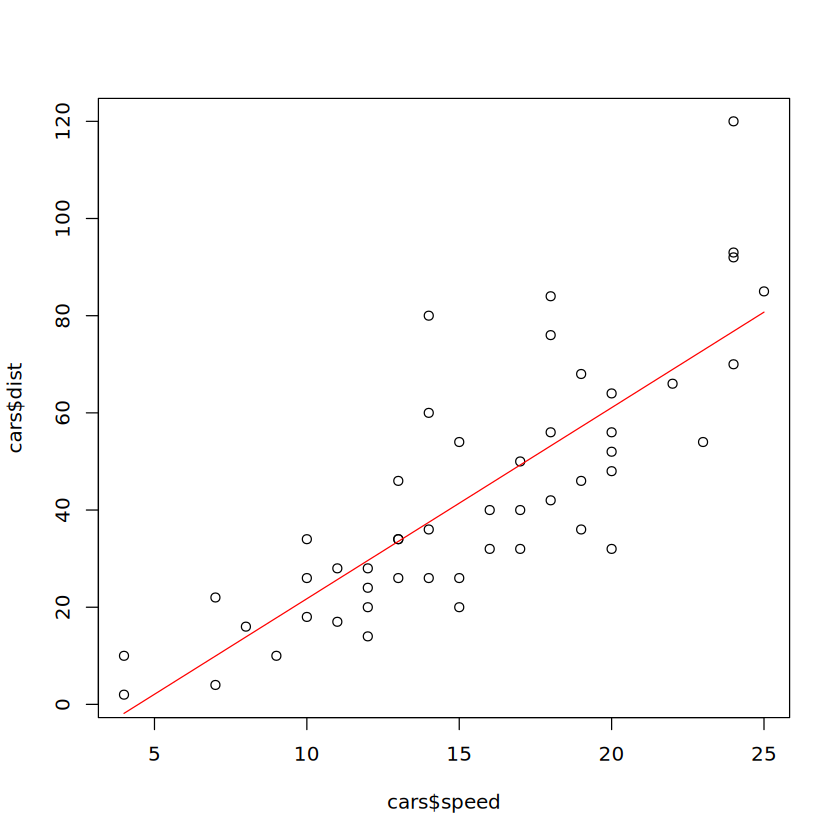

In [20]:
# À FAIRE
par(bg="white")
# Q1
a=cov(cars$speed,cars$dist)/var(cars$speed)
b=mean(cars$dist)-a*mean(cars$speed)
cat("a=",a,"\n","b=",b,"\n")
# Q2
lm(cars$dist~cars$speed)
# Q3
SCE=sum((cars$dist-(a*cars$speed+b))^2)
SCT=sum((cars$dist-mean(cars$dist))^2)
R2=SCE/SCT
cat("R2=",R2,"\n")
# Q4
plot(cars$speed,cars$dist)
x=seq(min(cars$speed),max(cars$speed),0.1)
lines(x,x*a+b,col="red")

## 2. Régression linéaire multiple

Le cadre général du modèle de régression linéaire peut être donné par un vecteur $y \in \mathbb{R}^n$ contenant les $n$ observations de la *variable à expliquer* et par une matrice $X \in \mathbb{R}^{n \times p}$ contenant les $n$ observations des $p$ *variables explicatives*. Parmi les variables explicatives, une colonne de 1 est souvent ajoutée pour traiter l'ordonnée à l'origine comme les autres variables et unifier les notations. La relation recherchée se formule à l'aide du *vecteur des coefficients* $\theta \in \mathbb{R}^p$,
\begin{equation*}
y = X\theta + \varepsilon
\end{equation*}
où $\varepsilon \in \mathbb{R}^n$ est le vecteur des résidus. Des calculs similaires à ceux vus en cours pour le critère des moindres carrés donnent la formulation matricielle de l'estimateur $\hat{\theta}$ lorsque la matrice $X^\top X$ est inversible,
\begin{equation*}
\hat{\theta} = (X^\top X)^{-1} X^\top y.
\end{equation*}

Nous considérons maintenant le jeu de données `swiss`.

In [21]:
help(swiss)

swiss                 package:datasets                 R Documentation

_S_w_i_s_s _F_e_r_t_i_l_i_t_y _a_n_d _S_o_c_i_o_e_c_o_n_o_m_i_c _I_n_d_i_c_a_t_o_r_s (_1_8_8_8) _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Standardized fertility measure and socioeconomic indicators for
     each of 47 French-speaking provinces of Switzerland at about 1888.

_U_s_a_g_e:

     swiss
     
_F_o_r_m_a_t:

     A data frame with 47 observations on 6 variables, _each_ of which
     is in percent, i.e., in [0, 100].

       [,1]  ‘Fertility’         Ig,                                             
                                 ‘common standardized fertility measure’         
       [,2]  ‘Agriculture’       % of males involved in agriculture              
                                 as occupation                                   
       [,3]  ‘Examination’       % draftees receiving highest mark               
                   

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer la régression linéaire multiple modélisant la fertilité en fonction des autres variables à l'aide de la fonction <code>lm()</code>.</li>
        <li>Recalculer les coefficients de la régression par la formule matricielle donnée ci-dessus.</li>
        <li>Utiliser la fonction <code>step()</code> pour réduire la dimension du modèle en retirant les variables négligeables.</li>
    </ol>
</div>

In [25]:
# À FAIRE
lm(swiss$Fertility~.,data=swiss)
y=swiss$Fertility
X=as.matrix(cbind(1,swiss[,c("Agriculture","Examination","Education","Catholic","Infant.Mortality")]))
b=solve(t(X)%*%X)%*%t(X)%*%y
step(lm(swiss$Fertility~.,data=swiss))


Call:
lm(formula = swiss$Fertility ~ ., data = swiss)

Coefficients:
     (Intercept)       Agriculture       Examination         Education  
         66.9152           -0.1721           -0.2580           -0.8709  
        Catholic  Infant.Mortality  
          0.1041            1.0770  


Start:  AIC=190.69
swiss$Fertility ~ Agriculture + Examination + Education + Catholic + 
    Infant.Mortality

                   Df Sum of Sq    RSS    AIC
- Examination       1     53.03 2158.1 189.86
<none>                          2105.0 190.69
- Agriculture       1    307.72 2412.8 195.10
- Infant.Mortality  1    408.75 2513.8 197.03
- Catholic          1    447.71 2552.8 197.75
- Education         1   1162.56 3267.6 209.36

Step:  AIC=189.86
swiss$Fertility ~ Agriculture + Education + Catholic + Infant.Mortality

                   Df Sum of Sq    RSS    AIC
<none>                          2158.1 189.86
- Agriculture       1    264.18 2422.2 193.29
- Infant.Mortality  1    409.81 2567.9 196.03
- Catholic          1    956.57 3114.6 205.10
- Education         1   2249.97 4408.0 221.43



Call:
lm(formula = swiss$Fertility ~ Agriculture + Education + Catholic + 
    Infant.Mortality, data = swiss)

Coefficients:
     (Intercept)       Agriculture         Education          Catholic  
         62.1013           -0.1546           -0.9803            0.1247  
Infant.Mortality  
          1.0784  


## 3. Analyse de variance

Dans cette dernière partie, nous utiliserons le jeu de données `iris`.

In [26]:
help(iris)

iris                 package:datasets                  R Documentation

_E_d_g_a_r _A_n_d_e_r_s_o_n'_s _I_r_i_s _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     This famous (Fisher's or Anderson's) iris data set gives the
     measurements in centimeters of the variables sepal length and
     width and petal length and width, respectively, for 50 flowers
     from each of 3 species of iris.  The species are _Iris setosa_,
     _versicolor_, and _virginica_.

_U_s_a_g_e:

     iris
     iris3
     
_F_o_r_m_a_t:

     ‘iris’ is a data frame with 150 cases (rows) and 5 variables
     (columns) named ‘Sepal.Length’, ‘Sepal.Width’, ‘Petal.Length’,
     ‘Petal.Width’, and ‘Species’.

     ‘iris3’ gives the same data arranged as a 3-dimensional array of
     size 50 by 4 by 3, as once provided by S-PLUS.  The first
     dimension gives the case number within the species subsample, the
     second the measurements with names ‘Sepal L.’, ‘Sepal W.’, ‘Petal
  

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les boxplots de chacune des 4 variables en fonction des modalités de la variable <code>Species</code>.<br>
            <center><img src="img/iris.png"></center>
        </li>
        <li>On souhaite appliquer une ANOVA sur chacun des variable quantitative de ce jeux de donnée. Que cherche-t-on à tester ? </li>
        <li>Le bon fonctionnement de l'ANOVA repose sur des hypothèses, quelles sont t'elle ? Mettez en place un tester pour vérifier si elles semble raisonnable sur ce jeux de données. </li>
        <li>Pour chaque variable quantitative du jeu de données <code>iris</code>, utiliser la fonction <code>aov()</code> puis <code>print()</code> et <code>summary()</code> sur le résultat pour appliquer l'ANOVA.</li>
    </ol>
</div>

Analysis of Variance Table

Response: iris$Sepal.Length
              Df Sum Sq Mean Sq F value    Pr(>F)    
iris$Species   2 63.212  31.606  119.26 < 2.2e-16 ***
Residuals    147 38.956   0.265                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


       Df             Sum Sq         Mean Sq          F value          Pr(>F) 
 Min.   :  2.00   Min.   :38.96   Min.   : 0.265   Min.   :119.3   Min.   :0  
 1st Qu.: 38.25   1st Qu.:45.02   1st Qu.: 8.100   1st Qu.:119.3   1st Qu.:0  
 Median : 74.50   Median :51.08   Median :15.936   Median :119.3   Median :0  
 Mean   : 74.50   Mean   :51.08   Mean   :15.936   Mean   :119.3   Mean   :0  
 3rd Qu.:110.75   3rd Qu.:57.15   3rd Qu.:23.771   3rd Qu.:119.3   3rd Qu.:0  
 Max.   :147.00   Max.   :63.21   Max.   :31.606   Max.   :119.3   Max.   :0  
                                                   NA's   :1       NA's   :1  

Analysis of Variance Table

Response: iris$Sepal.Width
              Df Sum Sq Mean Sq F value    Pr(>F)    
iris$Species   2 11.345  5.6725   49.16 < 2.2e-16 ***
Residuals    147 16.962  0.1154                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


       Df             Sum Sq         Mean Sq          F value          Pr(>F) 
 Min.   :  2.00   Min.   :11.34   Min.   :0.1154   Min.   :49.16   Min.   :0  
 1st Qu.: 38.25   1st Qu.:12.75   1st Qu.:1.5047   1st Qu.:49.16   1st Qu.:0  
 Median : 74.50   Median :14.15   Median :2.8939   Median :49.16   Median :0  
 Mean   : 74.50   Mean   :14.15   Mean   :2.8939   Mean   :49.16   Mean   :0  
 3rd Qu.:110.75   3rd Qu.:15.56   3rd Qu.:4.2832   3rd Qu.:49.16   3rd Qu.:0  
 Max.   :147.00   Max.   :16.96   Max.   :5.6725   Max.   :49.16   Max.   :0  
                                                   NA's   :1       NA's   :1  

Analysis of Variance Table

Response: iris$Petal.Length
              Df Sum Sq Mean Sq F value    Pr(>F)    
iris$Species   2 437.10 218.551  1180.2 < 2.2e-16 ***
Residuals    147  27.22   0.185                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


       Df             Sum Sq          Mean Sq            F value    
 Min.   :  2.00   Min.   : 27.22   Min.   :  0.1852   Min.   :1180  
 1st Qu.: 38.25   1st Qu.:129.69   1st Qu.: 54.7767   1st Qu.:1180  
 Median : 74.50   Median :232.16   Median :109.3683   Median :1180  
 Mean   : 74.50   Mean   :232.16   Mean   :109.3683   Mean   :1180  
 3rd Qu.:110.75   3rd Qu.:334.63   3rd Qu.:163.9598   3rd Qu.:1180  
 Max.   :147.00   Max.   :437.10   Max.   :218.5514   Max.   :1180  
                                                      NA's   :1     
     Pr(>F) 
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
 NA's   :1  

Analysis of Variance Table

Response: iris$Petal.Width
              Df Sum Sq Mean Sq F value    Pr(>F)    
iris$Species   2 80.413  40.207  960.01 < 2.2e-16 ***
Residuals    147  6.157   0.042                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


       Df             Sum Sq          Mean Sq            F value        Pr(>F) 
 Min.   :  2.00   Min.   : 6.157   Min.   : 0.04188   Min.   :960   Min.   :0  
 1st Qu.: 38.25   1st Qu.:24.721   1st Qu.:10.08308   1st Qu.:960   1st Qu.:0  
 Median : 74.50   Median :43.285   Median :20.12427   Median :960   Median :0  
 Mean   : 74.50   Mean   :43.285   Mean   :20.12427   Mean   :960   Mean   :0  
 3rd Qu.:110.75   3rd Qu.:61.849   3rd Qu.:30.16547   3rd Qu.:960   3rd Qu.:0  
 Max.   :147.00   Max.   :80.413   Max.   :40.20667   Max.   :960   Max.   :0  
                                                      NA's   :1     NA's   :1  

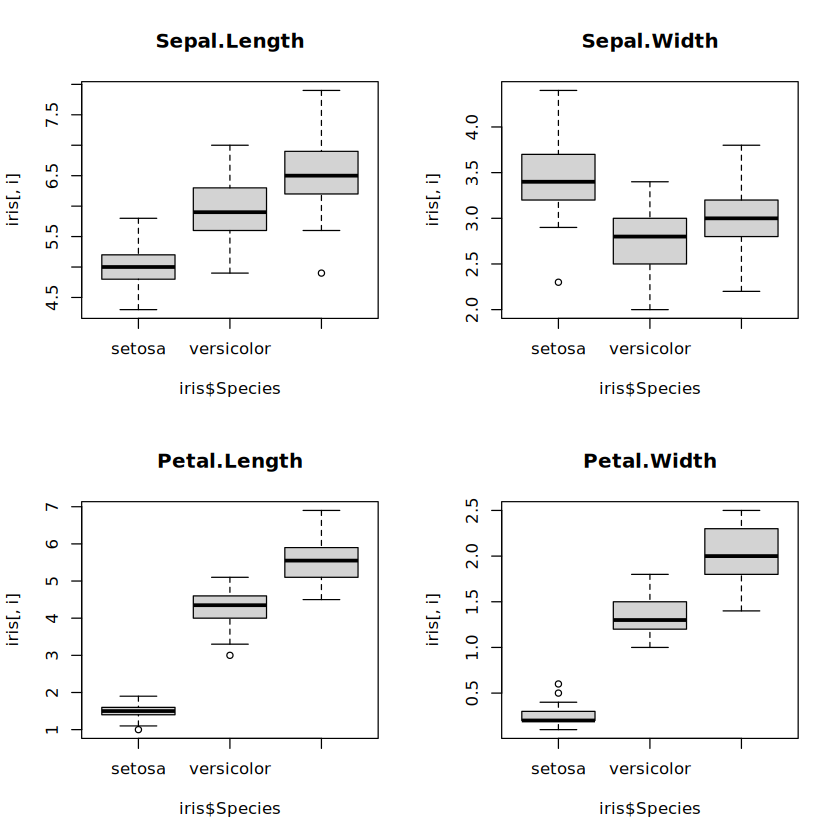

In [35]:
# À FAIRE
# Boxplot
par(bg="white")
par(mfrow=c(2,2))
for(i in 1:4){
  boxplot(iris[,i]~iris$Species,main=colnames(iris)[i])
}
# ANOVA
#Un test ANOVA à un facteur (analyse de variance) cherche à répondre à la question :

#👉 La moyenne d’une variable quantitative est-elle significativement différente entre plusieurs groupes définis par un facteur (ici Species) ?

#Formellement :

#H0 : toutes les espèces ont la même moyenne pour la variable considérée.

#H1 : au moins une espèce a une moyenne différente.
anov_SepalLength<- anova(lm(iris$Sepal.Length~iris$Species))
print(anov_SepalLength)
#Sources de variation

#iris$Species : effet du facteur "espèce" (3 groupes → 2 ddl).

#Residuals : variation intra-groupes, c’est-à-dire la variabilité entre fleurs d’une même espèce (147 ddl, car 150 - 3).

#2. Statistiques

#Sommes des carrés (Sum Sq)

#Espèce : 63.212

#Résidus : 38.956
#→ la variation expliquée par l’espèce est bien plus grande que la variation résiduelle.

#Carrés moyens (Mean Sq) = somme des carrés / ddl

#Espèce : 31.606

#Résidus : 0.265

#Rapport F = 31.606 ÷ 0.265 = 119.26
#→ très élevé : cela indique que la variabilité entre espèces est énorme par rapport à celle à l’intérieur de chaque espèce.

#3. Signification

#Pr(>F) < 2.2e-16
#→ la probabilité d’obtenir un tel F sous H0 (égalité des moyennes de Sepal.Length entre espèces) est pratiquement nulle.

#✅ Interprétation en mots :
#La longueur des sépales (Sepal.Length) diffère de façon hautement significative entre les trois espèces d’iris (setosa, versicolor, virginica).
summary(anov_SepalLength)
anov_SepalWidth<- anova(lm(iris$Sepal.Width~iris$Species))
print(anov_SepalWidth)
summary(anov_SepalWidth)
anov_PetalLength<- anova(lm(iris$Petal.Length~iris$Species))
print(anov_PetalLength)
summary(anov_PetalLength)
anov_PetalWidth<- anova(lm(iris$Petal.Width~iris$Species))
print(anov_PetalWidth)
summary(anov_PetalWidth)